# Group 6: Team Lightning McQueen
## Most Walkable Pittsburgh Neighborhood

# Sets of Stairs in Pittsburgh Neighborhoods
### Eric Hart

The dataset that I chose to analyze is the number of stairsets in each neighborhood of Pittsburgh. The terrain of the city of Pittsburgh is what I would consider the opposite of flat, so in order to make it easier for pedestrians to navigate their neighborhoods, there are often stairsets that are installed to aid in mobility, however they do not take into account those that are handicapped. So for this data set, I am going to consider more stairs in a neighborhood as a negative.

The first thing that I am going to do for is import the necessary libraries needed for this analysis.

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

Alright, next I'm going to be initializing the dataset that I downloaded from WPRDC.org that contains [data regarding stairs in Pittsburgh.](https://data.wprdc.org/dataset/city-steps/resource/43f40ca4-2211-4a12-8b4f-4d052662bb64) The way that this will be initialized is through a pandas Dataframe.

In [2]:
stairData = pd.read_csv("city_of_pittsburgh_steps.csv")

I'll quickly grab a sample of the file in order to confirm that it is infact all there.

In [3]:
stairData.sample(10)

,_id,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
558,559,354493135,O'Hern St from Buena Vista St to Perrysville Ave,1st Division,1948-01-01,Concrete,450.0,140.0,NaN,NaN,...,Central Northside,6.0,25,42003261400,1,25,1,1-10,40.459967,-80.014157
783,784,727571286,W Sycamore From Amabell St to Merrimac St,DOMI - Signs and Markings,1946-01-01,Concrete,215.0,21.0,NaN,NaN,...,Mount Washington,2.0,19,42003190300,5,19,3,4-1,40.432886,-80.013921
347,348,36516302,Hemlock St from James St to Compromise St,1st Division,1948-01-01,Concrete,338.0,143.0,1.0,4.0,...,East Allegheny,1.0,25,42003563200,1,25,1,1-10,40.458309,-80.001504
931,1382,1685325583,Grandview Park 3,Parks - Western,NaN,Concrete,NaN,NaN,NaN,NaN,...,Allentown,3.0,18,42003180300,5,18,3,4-5,40.426516,-79.997096
589,590,278456178,Phelan Way to Paulowna St,3rd Division,1951-01-01,Concrete,116.0,50.0,1.0,8.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.456021,-79.967455
54,55,955299807,Beeler St at Olympia Way from Beeler St,3rd Division,NaN,Concrete,84.0,60.0,0.0,100.0,...,Squirrel Hill North,8.0,14,42003140100,3,14,4,2-26,40.445162,-79.934884
745,746,1962737818,Templeton St from W Liberty Ave to Woodward Ave,4th Division,NaN,Concrete,270.0,NaN,0.0,100.0,...,Brookline,4.0,19,42003191900,5,19,6,4-26,40.398765,-80.024763
510,511,199900323,Montana St from Grizella St to Swanson St,1st Division,1964-01-01,Concrete,100.0,47.0,0.0,100.0,...,Perry North,1.0,26,42003260200,1,26,1,1-15,40.493713,-80.017316
190,191,1674986827,E Burgess St from Perrysville Ave to Maple Ave,1st Division,NaN,Concrete,288.0,47.0,NaN,NaN,...,Perry South,6.0,26,42003261400,1,26,1,1-22,40.467652,-80.009261
279,280,452385538,Glenbury St at Railroad Underpass to Pinecastl...,4th Division,1947-01-01,Concrete,75.0,55.0,0.0,100.0,...,Overbrook,4.0,32,42003320700,5,32,3,4-25,40.383062,-79.997738


Wow look at that, isn't that awesome? No it isn't, there's too much data on my screen for me to comprehend. I'm going to filter out this data to only include the total number of stairsets in each neighborhood.

In [4]:
filterStairs = stairData.loc[:, ['number_of_steps', 'neighborhood']]
filterStairs.sample(10)

,number_of_steps,neighborhood
775,177.0,Troy Hill
610,55.0,Carrick
276,114.0,Sheraden
759,NaN,Hazelwood
305,45.0,Westwood
919,14.0,Perry North
993,46.0,Sheraden
710,35.0,Marshall-Shadeland
179,143.0,East Hills
837,109.0,Crawford-Roberts


Alright, now that that's a lot easier to digest, let's actually take a look at the data from two points of view. First, let's look at it from the perspective of an able-bodied person with the ability to effectively climb stairs. The first step of this is to determine how many stair-sets are in each area of Allegheny County.

In [5]:
len(filterStairs['neighborhood'].unique())
stairSets = dict()
totalSteps = dict()
for index, row in filterStairs.iterrows():
    current = row['neighborhood']
    if current not in stairSets:
        stairSets[current] = 1
    else:
        stairSets[current] += 1
dictStairs = pd.DataFrame.from_dict(stairSets, orient = 'index', columns = ['number_of_stair_sets'])
dictStairs.head(10)

,number_of_stair_sets
South Oakland,10
South Side Slopes,109
Bedford Dwellings,6
Polish Hill,20
Upper Lawrenceville,12
Stanton Heights,13
Squirrel Hill South,28
Sheraden,35
Greenfield,40
West Oakland,6


*[Holy Moly!](https://media.tenor.com/TmvqZuZdfqQAAAAC/holy-moly-holy.gif)* That's a lot of stair-sets in the South Side Slopes, however, for some additional context, I think it is best to also take into account the total number of steps across all stair-sets in Allegheny County, and we can do that with the `.concat` function built into pandas. This function combines two data frames with the same indices.

In [6]:
for index, row in filterStairs.iterrows():
    current = row['neighborhood']
    if current not in totalSteps and not(math.isnan(float(row['number_of_steps']))):
        totalSteps[current] = float(row['number_of_steps'])
    elif not(math.isnan(float(row['number_of_steps']))):
        totalSteps[current] += float(row['number_of_steps'])
dictTotal = pd.DataFrame.from_dict(totalSteps, orient = 'index', columns = ['total_steps'])
bothDict = pd.concat([dictStairs, dictTotal], axis = 1)
bothDict.head(10)

,number_of_stair_sets,total_steps
South Oakland,10,361.0
South Side Slopes,109,4795.0
Bedford Dwellings,6,291.0
Polish Hill,20,1109.0
Upper Lawrenceville,12,920.0
Stanton Heights,13,867.0
Squirrel Hill South,28,320.0
Sheraden,35,1223.0
Greenfield,40,1611.0
West Oakland,6,376.0


Alright we're getting somewhere, now, what I am going to do is create a sort of stair density metric to measure the average number of steps per stair-set in each neighborhood. First, this will be initialized as a list and then added to the dataframe as a column. I am then going to sort the table by showing the lowest concentration of stairs at the top. I feel that this is better than just looking at the total number of steps and the number of stair sets because in the case of Squirrel Hill South, while there are 28 stair sets, the total number of stairs is only 320, meaning that the average length for each stairset is quite short.

In [7]:
bothDict = bothDict.assign(average_steps_per_stair_set = bothDict.total_steps / bothDict.number_of_stair_sets)
bothDict = bothDict.sort_values(by='average_steps_per_stair_set', ascending = True)
bothDict.head(10)

,number_of_stair_sets,total_steps,average_steps_per_stair_set
Allegheny West,3,23.0,7.666667
Point Breeze North,2,16.0,8.000000
Windgap,2,16.0,8.000000
South Shore,2,16.0,8.000000
Manchester,1,8.0,8.000000
Regent Square,4,35.0,8.750000
Mount Oliver Borough,1,9.0,9.000000
Squirrel Hill South,28,320.0,11.428571
South Side Flats,8,95.0,11.875000
Allegheny Center,6,78.0,13.000000


Alright, now that we have our final table, let's graph this in order to more easily visualize the data. This bar graph will show the average steps per stair set for each neighborhood.

Text(0, 0.5, 'Steps per Stair-Set')

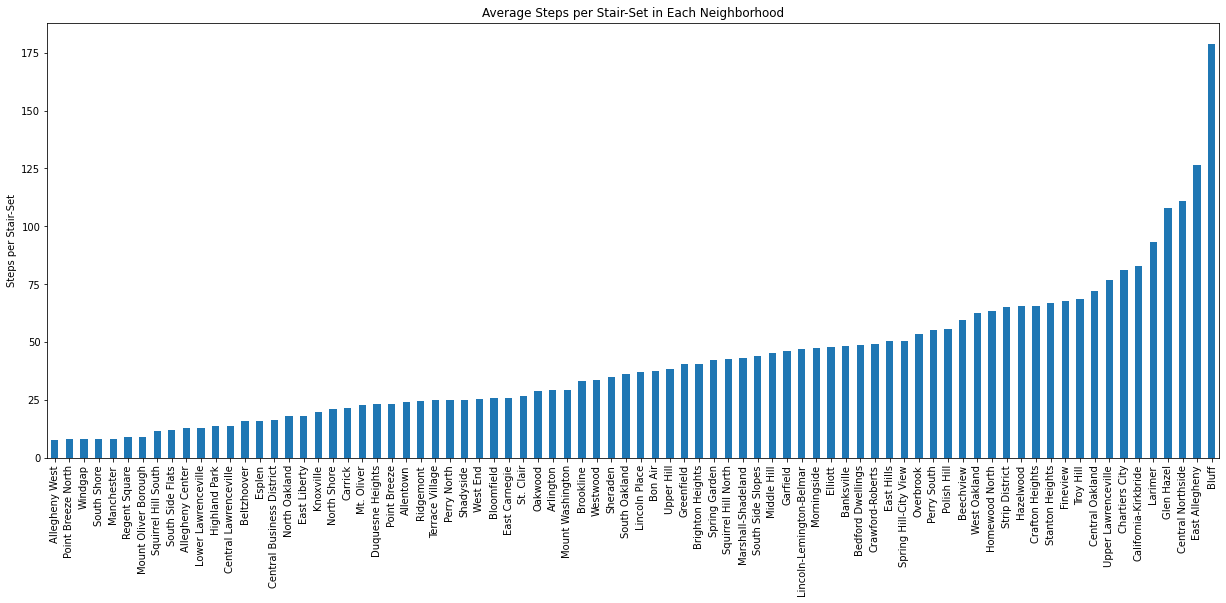

In [8]:
bothDict['average_steps_per_stair_set'].plot(kind = 'bar', figsize = (21, 8))
plt.title('Average Steps per Stair-Set in Each Neighborhood')
plt.ylabel('Steps per Stair-Set')

This graph is very informative, now let's dissect the information given into a nice little conclusion.

## Crime Rates in Pittsburgh Neighborhoods

Joshua Frank

I chose to analyze the Crime rates within the neiborhoods of Pittsburgh.

It is of my opinion that the safer the neighborhood, the better the quality of life will be. Threrefore I choise the metric of crim to see which neiborhoos had the least about of crime on average.

The first step of this process was to import pandas and clean up the data sheet from the Pittsburgh arcives.

In [1]:
import pandas as pd

data = pd.read_csv("crime.csv", index_col="INCIDENTNEIGHBORHOOD")
data.drop("_id", inplace=True, axis=1)
data.drop("PK", inplace=True, axis=1)
data.drop("CCR", inplace=True, axis=1)
data.drop("AGE", inplace=True, axis=1)
data.drop("GENDER", inplace=True, axis=1)
data.drop("RACE", inplace=True, axis=1)
data.drop("ARRESTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTZONE", inplace=True, axis=1)
data.drop("INCIDENTTRACT", inplace=True, axis=1)
data.drop("COUNCIL_DISTRICT", inplace=True, axis=1)
data.drop("PUBLIC_WORKS_DIVISION", inplace=True, axis=1)
data.drop("X", inplace=True, axis=1)
data.drop("Y", inplace=True, axis=1)
data.head(10)

,ARRESTTIME,OFFENSES
INCIDENTNEIGHBORHOOD,,
Bloomfield,2016-08-24T12:20:00,3929 Retail Theft.
Outside City,2016-08-03T14:55:00,13(a)(16) Possession of Controlled Substance
Westwood,2016-08-03T16:45:00,3929 Retail Theft.
East Allegheny,2016-08-05T02:36:00,5503 Disorderly Conduct. / 5505 Public Drunken...
Crafton Heights,2016-08-06T02:00:00,2702 Aggravated Assault. / 2705 Recklessy Enda...
Greenfield,2016-08-15T13:30:00,3929 Retail Theft.
Brookline,2016-08-16T13:00:00,2701 Simple Assault.
Regent Square,2016-08-16T04:25:00,2701 Simple Assault. / 5505 Public Drunkenness...
East Liberty,2016-08-29T17:55:00,903 Criminal Conspiracy. / 3701 Robbery.


## Data Analysis

I first chose the parameters for which crimes are the worst.

I decided on the top five options which were the greatest threats to a peaceful society.

-Retail theft
-Terroristic threats
-Simple Assult
-Robbery
-Burglory

In [8]:
# filter the data for top five crimes
specific_crimes = ['2701 Simple Assault.', '3502 Burglary.', '3701 Robbery.', '706 Terroristic Threats.', '3929 Retail Theft.']

crime_filter = data['OFFENSES'].isin(specific_crimes)

filtered_data = data[crime_filter]

print(filtered_data)

                               ARRESTTIME              OFFENSES
INCIDENTNEIGHBORHOOD                                           
Bloomfield            2016-08-24T12:20:00    3929 Retail Theft.
Westwood              2016-08-03T16:45:00    3929 Retail Theft.
Greenfield            2016-08-15T13:30:00    3929 Retail Theft.
Brookline             2016-08-16T13:00:00  2701 Simple Assault.
Carrick               2016-08-07T13:40:00  2701 Simple Assault.
...                                   ...                   ...
Overbrook             2023-08-27T14:30:00  2701 Simple Assault.
Shadyside             2023-08-26T13:27:00    3929 Retail Theft.
South Side Flats      2023-08-26T16:15:00    3929 Retail Theft.
East Liberty          2023-10-04T13:00:00    3929 Retail Theft.
Shadyside             2023-08-29T14:51:00    3929 Retail Theft.

[5783 rows x 2 columns]


This was a start but I than needed to group these neighborhoods and their crimes together into a more usable data structure

In [9]:
crime_counts = filtered_data.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='COUNT')

print(crime_counts)

    INCIDENTNEIGHBORHOOD              OFFENSES  COUNT
0       Allegheny Center  2701 Simple Assault.     26
1       Allegheny Center        3502 Burglary.      3
2       Allegheny Center         3701 Robbery.      6
3         Allegheny West  2701 Simple Assault.      6
4         Allegheny West        3502 Burglary.      4
..                   ...                   ...    ...
272             Westwood        3502 Burglary.      1
273             Westwood         3701 Robbery.      1
274             Westwood    3929 Retail Theft.      7
275              Windgap  2701 Simple Assault.      9
276              Windgap        3502 Burglary.      3

[277 rows x 3 columns]


Now that they are organized I used the matplot functions of panadas as well as the seaborn solution to give a plot of this data 

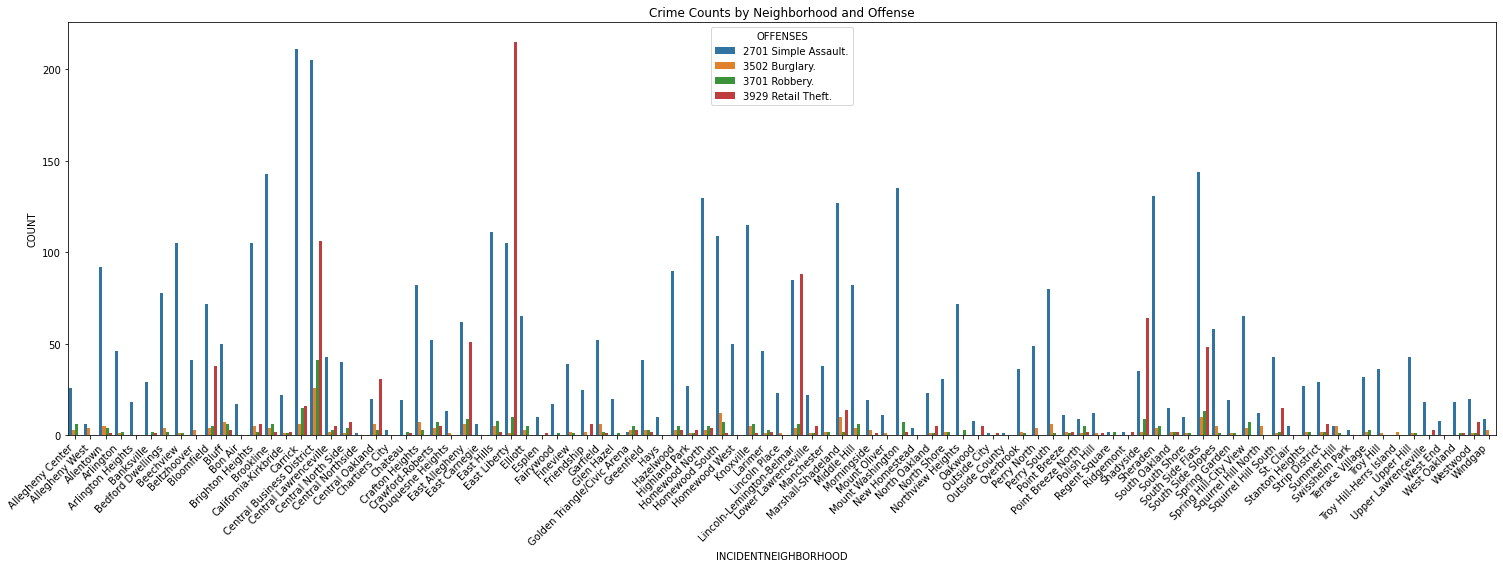

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(21, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='COUNT', hue='OFFENSES', data=crime_counts)
plt.title('Crime Counts by Neighborhood and Offense')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This paints a picture of the total crimes and their neighborhoods but lacks readability. I further filtered this down into total crimes for each neighborhood

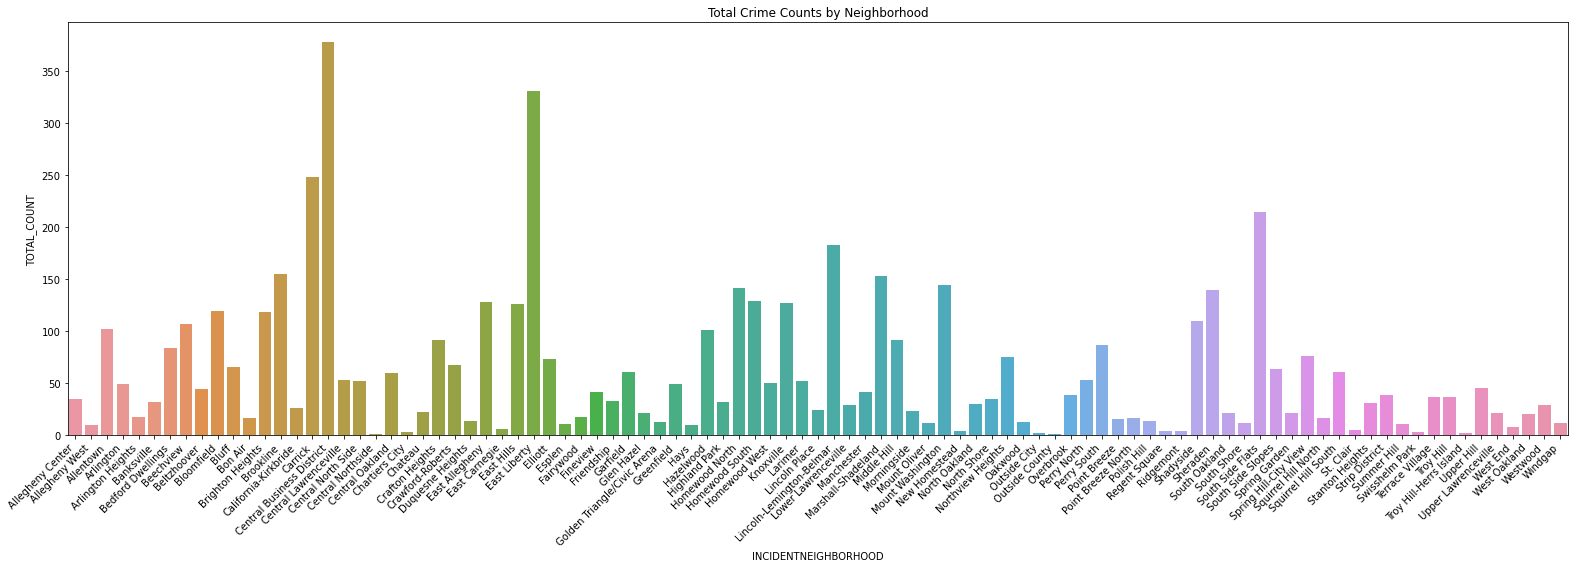

In [23]:
total_crime_counts = filtered_data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='TOTAL_COUNT')
plt.figure(figsize=(22, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=total_crime_counts)
plt.title('Total Crime Counts by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Still not pretty but we are close.
I decided to narrow the seach to the top five least crime riden neighborhoods for these top 5 choices and compare them below.

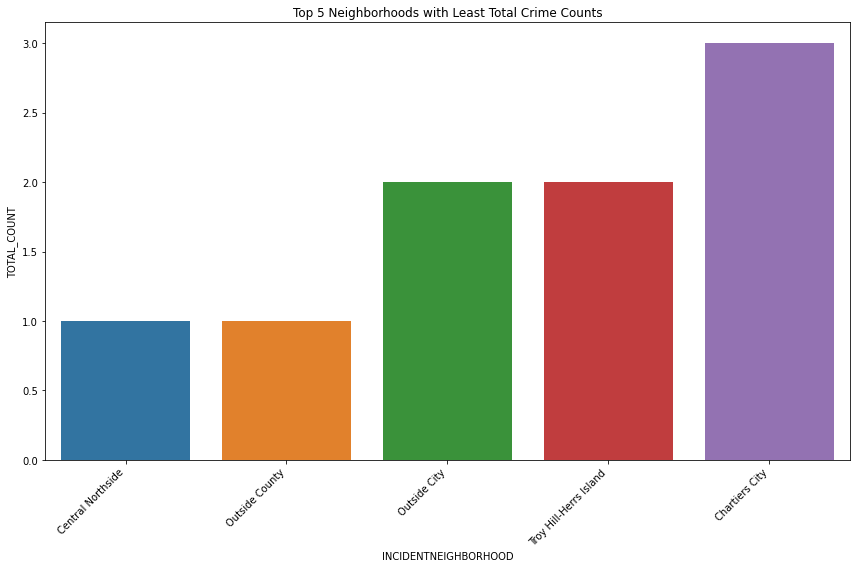

In [15]:
# Sorted by total crime counts in ascending order and selected the top 5
top5_least_crime_neighborhoods = total_crime_counts.sort_values(by='TOTAL_COUNT').head(5)

# Set up the plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=top5_least_crime_neighborhoods)
plt.title('Top 5 Neighborhoods with Least Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Crimes rates per Neighborhood - This is data foucses on Pittsburgh

Using data from the WRPDC, we can gauge overall criminal activity in each Pittsburgh neighborhood. This data could potentially give us an idea of which neighborhood has the most violent and experienced residents, and can help estimate the possibility of 2 emerging tributes becoming victors.

WRPDC - "Police Incident Blotter
https://data.wprdc.org/dataset/uniform-crime-reporting-data

In [3]:
# Importing packages for data analysis
import pandas as pd
import numpy as np
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt 

In [16]:
data = pd.read_csv("Crime rate.csv")
data.columns
data.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


<h3>Cleaning our Data</h3>
<p>Now that we have a good idea of what our data looks like, we are going to have to clean it to get rid of irrelevant entries. For instance, we can get rid of 'Outside State', 'Outside County', 'Mt. Oliver Boro', etc. as they are not really neighborhoods.</p>

In [18]:
data.columns

Index(['_id', 'PK', 'CCR', 'HIERARCHY', 'INCIDENTTIME', 'INCIDENTLOCATION',
       'CLEAREDFLAG', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTHIERARCHYDESC', 'OFFENSES', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [24]:
to_drop = ['Outside State',
    'Outside County', 
    'Outside City', 
    'Mt. Oliver Boro', 
    'Mt. Oliver Neighborhood', 
    'Golden Triangle/Civic Arena']
data=data[~data['INCIDENTNEIGHBORHOOD'].isin(to_drop)]
data.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
5,6,2802321,16000045.0,23,2016-01-01T00:24:00,"1300 Block E CARSON ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 3503.B1I DEF. TRESPA...,1702.0,3.0,4.0,-79.985175,40.428607


In [92]:
in_my = data.INCIDENTNEIGHBORHOOD.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
in_sort = in_my.sort_values(by = 'counts', ascending = True)

#top_ten
top_ten= in_sort.head(10)
top_ten

,Neighborhood,counts
91,Ridgemont,6
90,Swisshelm Park,7
89,New Homestead,9
88,Regent Square,10
87,Troy Hill-Herrs Island,13
86,East Carnegie,14
85,Oakwood,17
84,Summer Hill,21
83,Duquesne Heights,30
82,Allegheny West,33


In [93]:
top_ten.columns

Index(['Neighborhood', 'counts'], dtype='object')

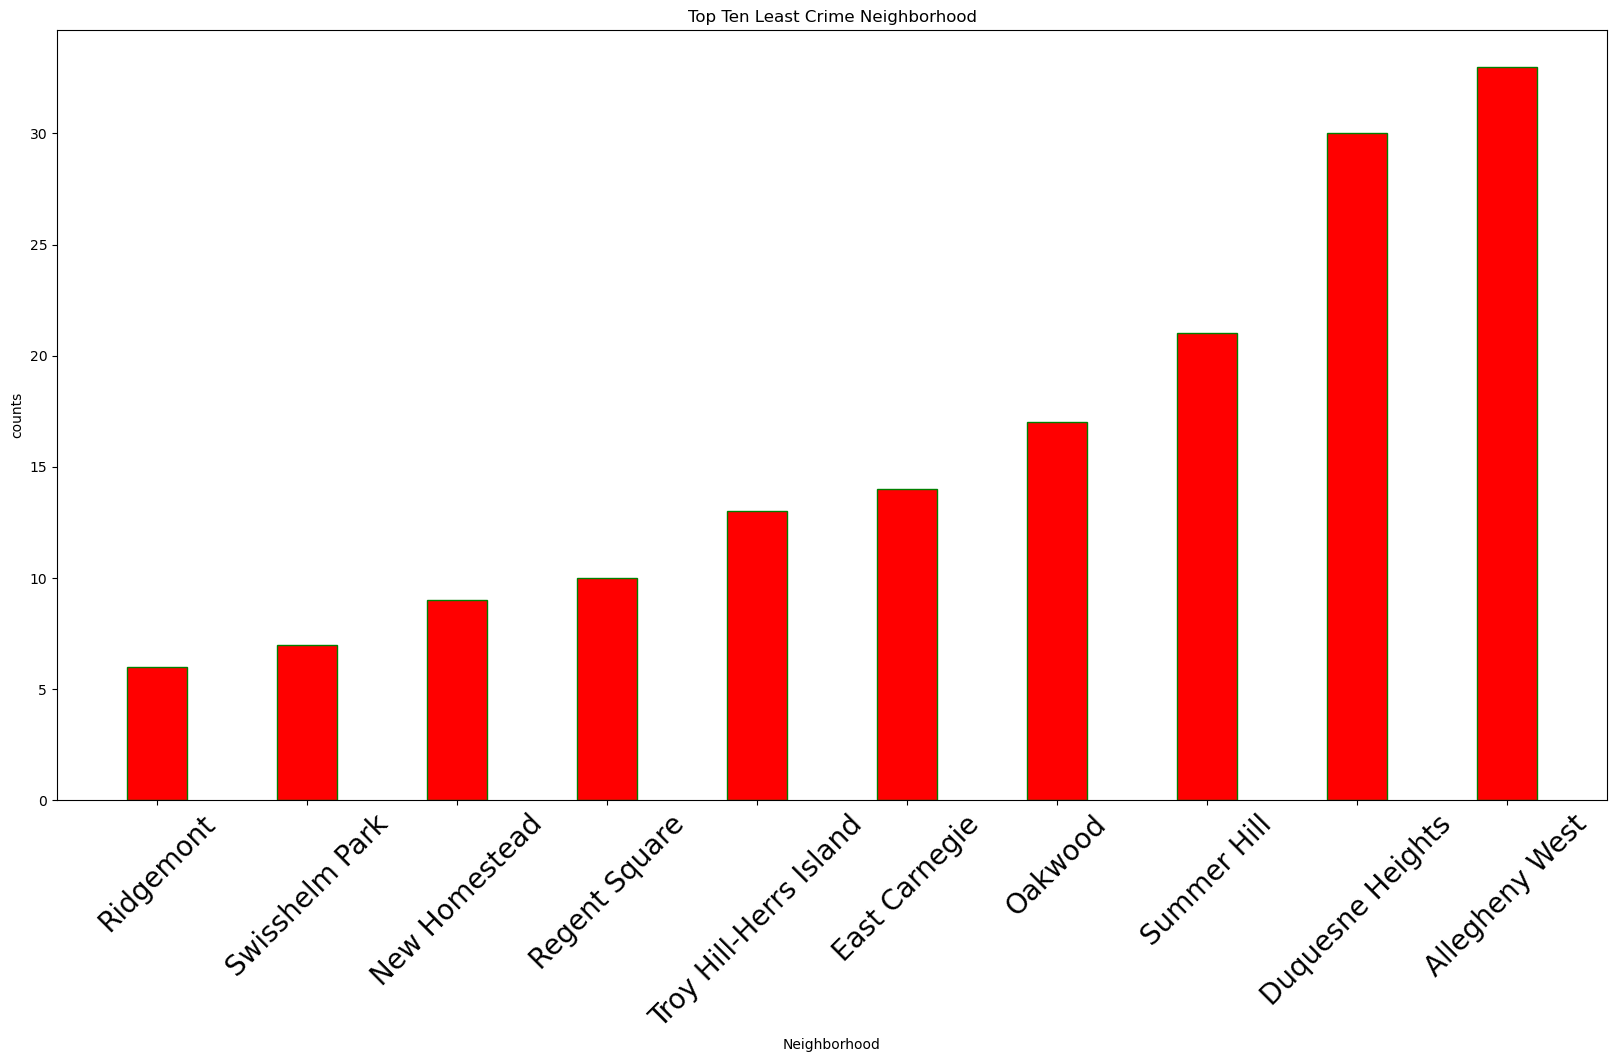

In [91]:
fig = plt.figure(figsize = (20,10))
font_size = 20

plt.bar(top_ten.Neighborhood,top_ten.counts,color = 'Red',edgecolor = 'green',width = 0.4)
plt.xticks(rotation = 45)
plt.rc('xtick',labelsize = font_size)



plt.xlabel("Neighborhood")
plt.ylabel("counts")
plt.title("Top Ten Least Crime Neighborhood")


plt.show()

## Eric's Conclusion

When taking accessiblity into account, it is better for the average amount of stairs to be lower, as this means the neighborhood is a lot more flat. This means that **Allegheny West** would be considered the best neighborhood for those that are not physically able to climb stairs with an average stair set consisting of **7.66** stairs per set.

In [10]:
bothDict['average_steps_per_stair_set'].head(5)

Allegheny West        7.666667
Point Breeze North    8.000000
Windgap               8.000000
South Shore           8.000000
Manchester            8.000000
Name: average_steps_per_stair_set, dtype: float64

Using this same metric, we can determine that the worst neighborhood for those with limited mobility is **Bluff** with an average stair set consisting of **179** stairs per set.

In [11]:
bothDict['average_steps_per_stair_set'].tail(5)

Larimer               93.0
Glen Hazel           108.0
Central Northside    111.0
East Allegheny       126.5
Bluff                179.0
Name: average_steps_per_stair_set, dtype: float64

## Josh's Conclusion

Central Northside and Outside County tied on total counts of crimes reported.

I decided to find what specific crime these two areas reported and found this below

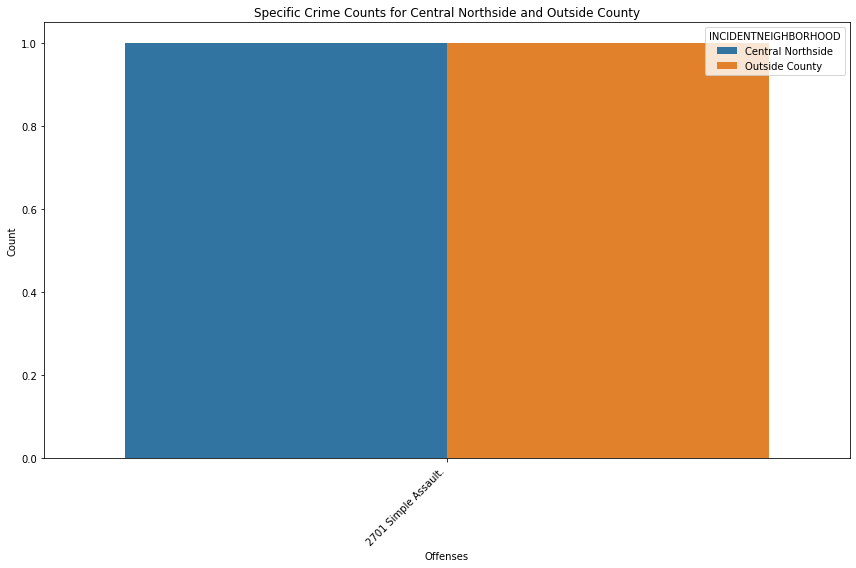

In [40]:

# Specify the neighborhoods to visualize
neighborhoods_to_visualize = ['Central Northside', 'Outside County']

# Filtered data for the specified neighborhoods and offenses
neighborhood_data = filtered_data[filtered_data.index.isin(neighborhoods_to_visualize)]

# Group by 'INCIDENTNEIGHBORHOOD' and 'OFFENSES', then sum the counts
offense_totals = neighborhood_data.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='COUNT')

# Set up the bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='OFFENSES', y='COUNT', hue='INCIDENTNEIGHBORHOOD', data=offense_totals)
plt.title('Specific Crime Counts for Central Northside and Outside County')
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Overall it appears there is a dead tie in my search for the safest neighborhood. I choose Central Northside as the overall safest neighborhod for my portion. As it aligns closly with safest walkability in Pittsburgh. 

## Kai's Conclusion
From the data grpah, Ridgemont is the best neighorhood with less crim commited. While I was anticipated for Shadyside ti be the safest neighborhood, data shows that it was not even among the top ten for least crime committed

## Overall, our best neighborhood was Allegheny West because of the relatively low crime rate and the lowest concentration of stairs in that neighborhood. 